In [ ]:
!pip install tensorflow tensorflow opencv-python matplotlib


In [ ]:
import tensorflow as tf
import os

In [ ]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')


[]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/ads'


In [ ]:
img= cv2.imread(os.path.join('/content/ads','/content/ads/safe','/content/ads/safe/1.png'))
img.shape

(500, 500, 3)

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/ads/malicious/14.png


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/ads')


Found 49 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()


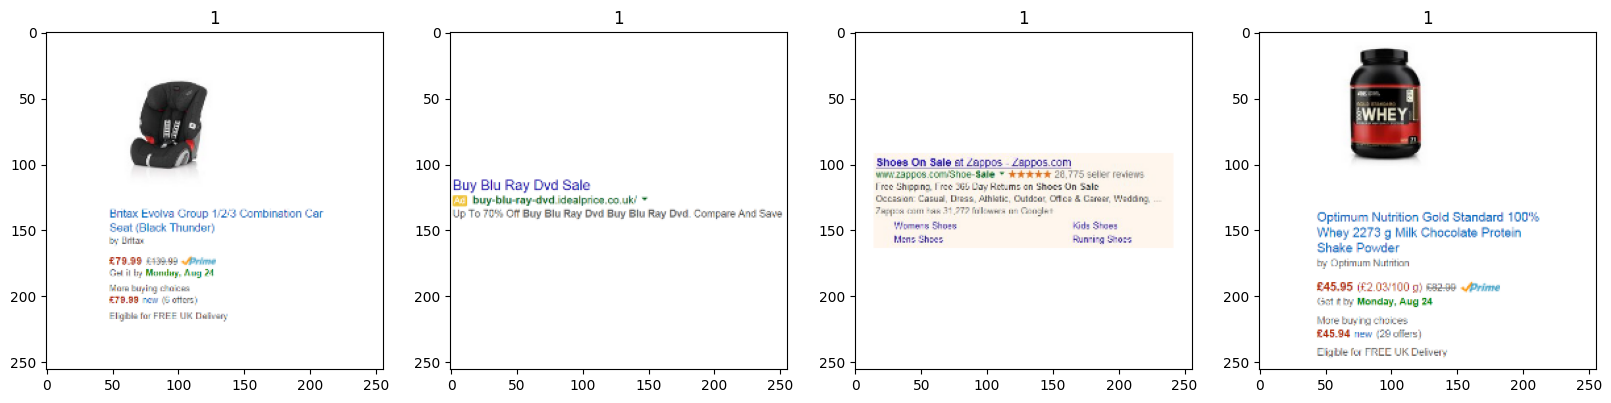

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0]

array([[[[255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         ...,
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ]],

        [[255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         ...,
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ]],

        [[255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         ...,
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ]],

        ...,

        [[255.       , 255.       , 25

In [ ]:
data = data.map(lambda x,y: (x/255, y))


In [ ]:
data.as_numpy_iterator().next()


(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
len(data)

2

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [ ]:
train_size

1

In [ ]:
val_size

1

In [ ]:
test_size

0

In [92]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [93]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [95]:
model = Sequential()


In [96]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [98]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [99]:
logdir='logs'


In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [102]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.4665 - accuracy: 0.8750 - val_loss: 0.4038 - val_accuracy: 0.8824
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.2999 - accuracy: 0.9062 - val_loss: 0.1183 - val_accuracy: 0.9412
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.2112 - accuracy: 0.9062 - val_loss: 0.1471 - val_accuracy: 0.9412
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.1854 - accuracy: 0.9062 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.2010 - accuracy: 0.9688 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.1383 - accuracy: 0.9688 - val_loss: 0.0893 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.1001 - accuracy: 0.9688 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========================

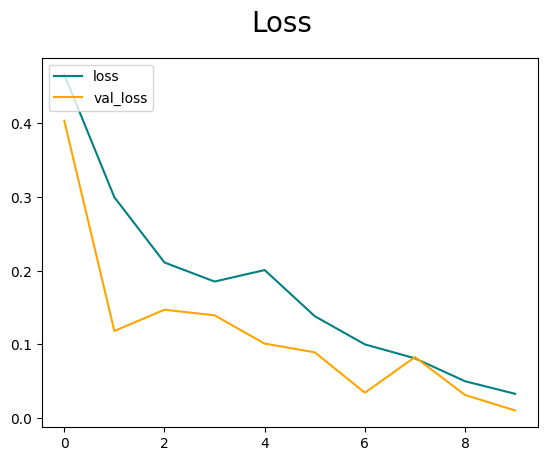

In [103]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

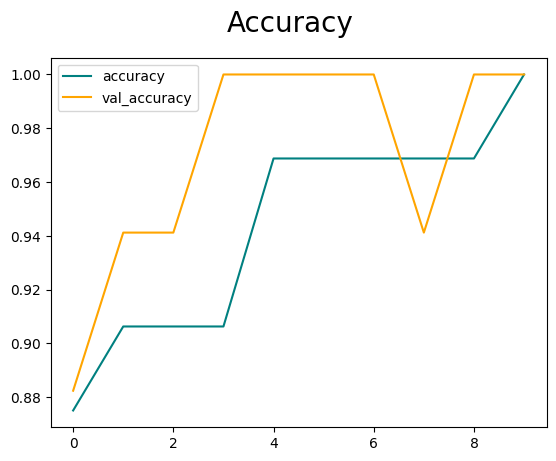

In [104]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [105]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [106]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [107]:
for batch in test.as_numpy_iterator():
    X, y = batch
    what = model.predict(X)
    pre.update_state(y, what)
    re.update_state(y, what)
    acc.update_state(y, what)

In [108]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [109]:
import cv2


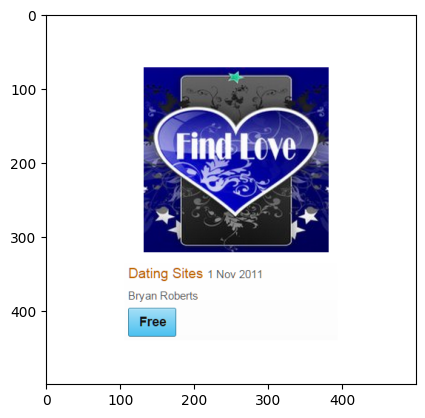

In [110]:
img = cv2.imread('/content/10.png')
plt.imshow(img)
plt.show()

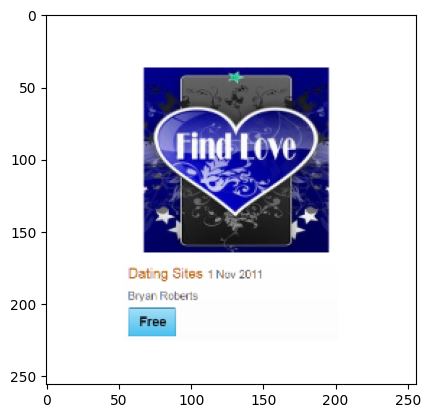

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
what = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 236ms/step


In [113]:
what

array([[0.9820947]], dtype=float32)

In [114]:
if what > 0.5:
    print(f'Predicted class is malicious')
else:
    print(f'Predicted class is safe')

Predicted class is malicious
